In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
#read the dataset
data = pd.read_csv('Downloads/Admission_Predict_Ver1.1.csv')
data=data.drop(columns=['Serial No.'])

In [2]:
data.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
X = data.iloc[:, :-1].values # Independent Var x
y = data.iloc[:, -1].values  # Dependent Var y


In [4]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


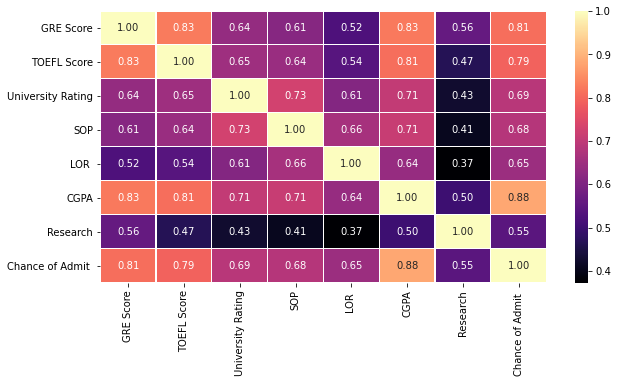

In [7]:
# looking for relevant independent variable
# Let see how values are correlated
plt.figure(figsize=(10,5))
cr = data.corr()
sb.heatmap(cr, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()


In [8]:
#split dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)



In [9]:
# If the "chance of admit" is greater than "80" then the admission is confirmed means "1"
y_train = [1 if each > 0.8 else 0 for each in y_train]
# If the "chance of admit" is lower than "80" then the admission is not confirmed means "0"
y_test = [1 if each > 0.8 else 0 for each in y_test]


In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 60, random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=60, random_state=0)

In [11]:
y_pred = classifier.predict(X_test)


In [12]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))


[[76  2]
 [ 2 20]]
Accuracy: 96.00%


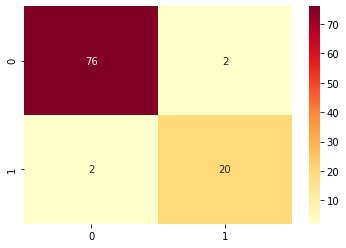

In [13]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap="YlOrRd")
plt.show()

In [14]:
#computing the metrics
from sklearn import metrics

In [15]:
import numpy as np
import pandas as pd
metrics_data = pd.DataFrame({'Metric':['MAE','MSE','RMSE','R-squared'],
                            'Value':[metrics.mean_absolute_error(y_test,y_pred),
                                     metrics.mean_squared_error(y_test,y_pred),
                                     np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
                                     metrics.explained_variance_score(y_test,y_pred)]}).round(3)

In [16]:
metrics_data

,Metric,Value
0,MAE,0.040
1,MSE,0.040
2,RMSE,0.200
3,R-squared,0.767


Text(0.5, 1.0, 'Predicted vs Actual Values (r =0.8834)')

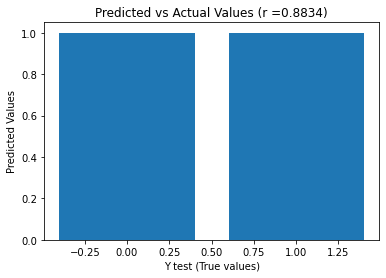

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
plt.bar(y_test,y_pred)
plt.xlabel('Y test (True values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (r ={0:0.4f})'.format(pearsonr(y_test,y_pred) [0]))

Text(0.5, 1.0, 'Predicted vs Actual Values (r =0.8834)')

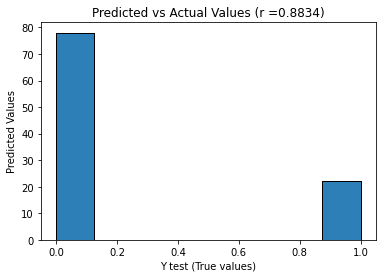

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
sns.histplot(y_test)
sns.histplot(y_pred)
plt.xlabel('Y test (True values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (r ={0:0.4f})'.format(pearsonr(y_test,y_pred) [0]))

In [24]:
# If the "chance of admit" is greater than "80" then the admission is confirmed means "1"
y_train = [1 if each > 0.8 else 0 for each in y_train]
# If the "chance of admit" is lower than "80" then the admission is not confirmed means "0"
y_test = [1 if each > 0.8 else 0 for each in y_test]
